# Table of Contents
* [Goals](#Goals)
* [Data](#Data)                                                                                                                 
    * [Loading the data](#Loadingthedata)
    * [Data Information](#DataInformation)
* [Reading the Data](#ReadingtheData)
    * [The Number Of Males And Females](#MF)
    * [What devices are used the most by the users?](#WhatD)
    * [Which are the most comman plans subscribed by users?](#Common)
    * [Which plan is giving the most income?](#Plan)
    * [Number of User on Devices and their Age](#Age)
    * [Age distribution](#distribution)
    * [Devices used by countries](#Devices)
* [Conclusion](#Conclusion)

## Goals <a class="anchor" id="Goals"></a>
This notebook contains an analysis on some Global earth temperature.  The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

## Data <a class="anchor" id="Data"></a>
The data for the project is taken from Kaggle:
https://www.kaggle.com/datasets/joebeachcapital/global-earth-temperatures?resource=download


### Loading the data <a class="anchor" id="Loadingthedata"></a>


First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from Global Temperature.csv and preview the first five rows of the DataFrame.

In [166]:
%matplotlib notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [167]:
df = pd.read_csv('Netflix Userbase.csv')

### Data Information <a class="anchor" id="DataInformation"></a>
Some immediate insights are:
* There are 10 columns and 2,500 rows.
* The name and datatype of each column -- most values are objects in this dataset.
* There are no missing values 

In [168]:
#to see all the columns
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [170]:
print(df.describe())

          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


In [171]:
#see if there is any missing data 
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

## Reading the Data <a class="anchor" id="ReadingtheData"></a>

In [172]:
df.head(10)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
5,6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
6,7,Standard,12,09-12-21,25-06-23,Brazil,46,Male,Tablet,1 Month
7,8,Basic,10,02-04-23,24-06-23,Mexico,39,Female,Laptop,1 Month
8,9,Standard,12,20-10-22,23-06-23,Spain,37,Male,Smartphone,1 Month
9,10,Premium,15,07-01-23,22-06-23,Italy,44,Female,Smart TV,1 Month


#### Data manipulation

In [173]:
#print(df['Join Date'].dtype)   # Join Date is a object, we need to convert it into DateTime Type
df['Join Date'] = pd.to_datetime(df['Join Date'])
#print(df['Join Date'].dtype)
df['Join Year'] = df['Join Date'].dt.year

## The number of Males and Females <a class="anchor" id="MF"></a>

In [174]:
gender = df['Gender'].value_counts()
print(gender)

Female    1257
Male      1243
Name: Gender, dtype: int64


<IPython.core.display.Javascript object>


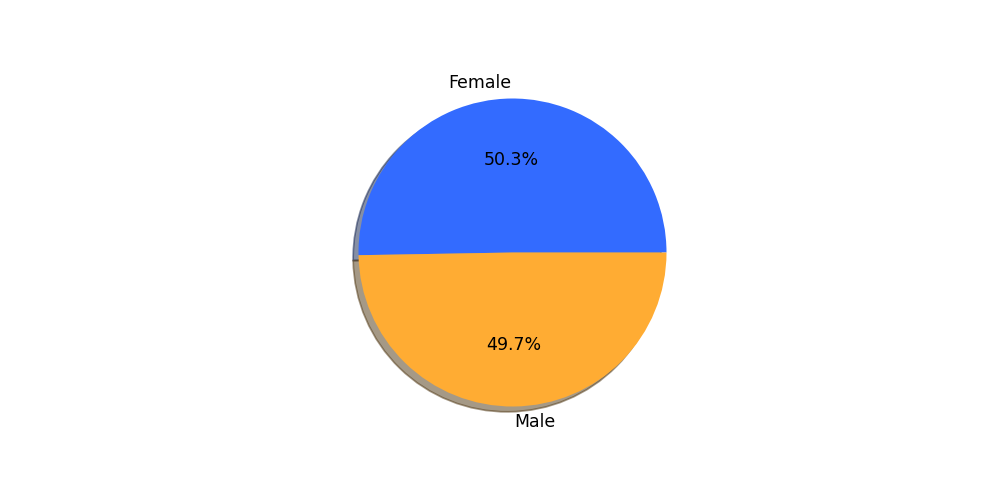

([<matplotlib.patches.Wedge at 0x25c3e794f70>,
 [Text(-0.009675938404905706, 1.0999574429113086, 'Female'),
  Text(0.009675938404905327, -1.0999574429113086, 'Male')],
 [Text(-0.005277784584494021, 0.5999767870425319, '50.3%'),
  Text(0.005277784584493813, -0.5999767870425319, '49.7%')])

In [175]:
colors = ['#336BFF','#FFAC33']
plt.figure(figsize=(8,4))
plt.pie(gender.values, labels = gender.index, autopct='%1.1f%%',colors = colors, shadow = True)

## What devices are used the most by the users? <a class="anchor" id="WhatD"></a>

In [176]:
deviceUsed = df.Device.value_counts()
print(deviceUsed)

Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: Device, dtype: int64


<IPython.core.display.Javascript object>


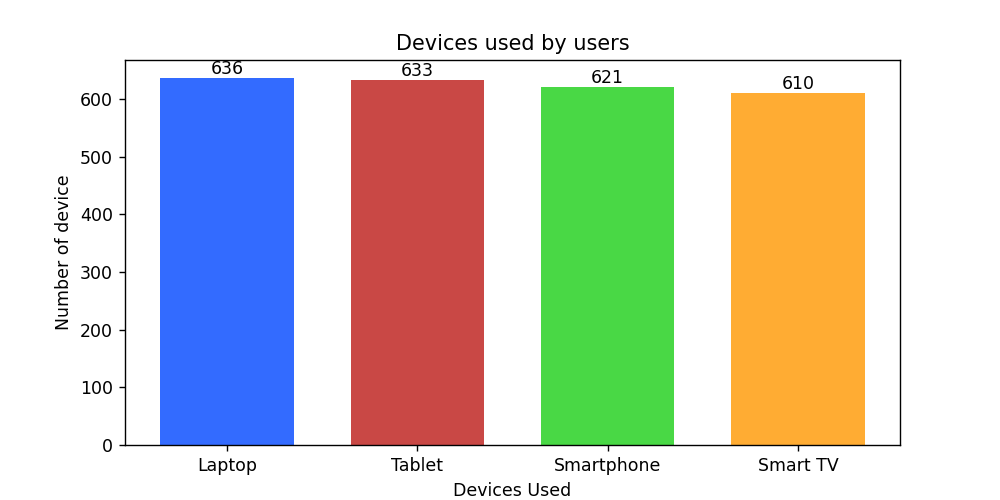

Text(0, 0.5, 'Number of device')

In [177]:
plt.figure(figsize=(8,4))
plt.title("Devices used by users")
plt.bar_label(plt.bar(deviceUsed.index, deviceUsed.values, width = 0.7, color = ['#336BFF',"#C94845","#49D845","#FFAC33"]))
plt.xlabel("Devices Used")
plt.ylabel("Number of device")

## Which are the most comman plans subscribed by users? <a class="anchor" id="Common"></a>


In [178]:
Plans = df['Subscription Type'].value_counts()
print(Plans)

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64


<IPython.core.display.Javascript object>


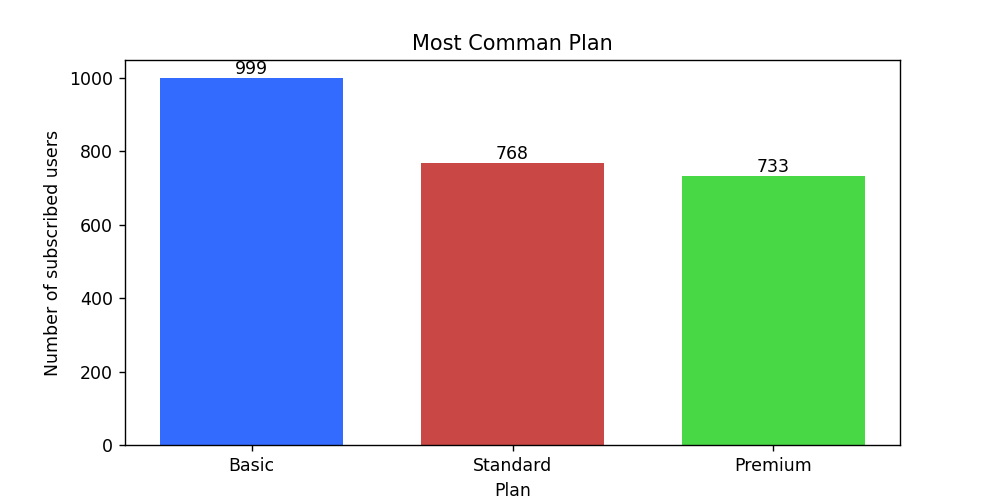

Text(0, 0.5, 'Number of subscribed users')

In [179]:
plt.figure(figsize=(8,4))
plt.title("Most Comman Plan")
plt.bar_label(plt.bar(Plans.index, Plans.values, width = 0.7, color = ['#336BFF',"#C94845","#49D845"]))
plt.xlabel("Plan")
plt.ylabel("Number of subscribed users")

## Which plan is giving the most income? <a class="anchor" id="Plan"></a>

In [180]:
#as we know the revenue of each plan is, basic = 10, standard = 12, premium = 15
plans = df['Subscription Type'].value_counts()
basic = 999 * 10
standard = 768 * 12
premium = 733 * 15
lst = [basic,standard,premium]
print(plans)
print(lst)

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64
[9990, 9216, 10995]


<IPython.core.display.Javascript object>


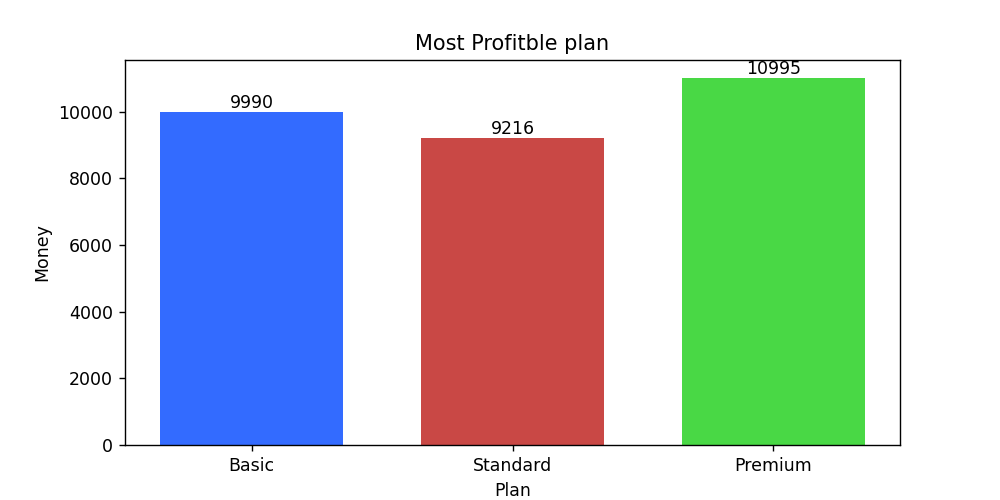

Text(0, 0.5, 'Money')

In [181]:
plt.figure(figsize=(8,4))
plt.title("Most Profitble plan")
plt.bar_label(plt.bar(plans.index, lst, width = 0.7, color = ['#336BFF',"#C94845","#49D845"]))
plt.xlabel("Plan")
plt.ylabel("Money")

## Number of User on Devices and their Age <a class="anchor" id="Age"></a>


<IPython.core.display.Javascript object>


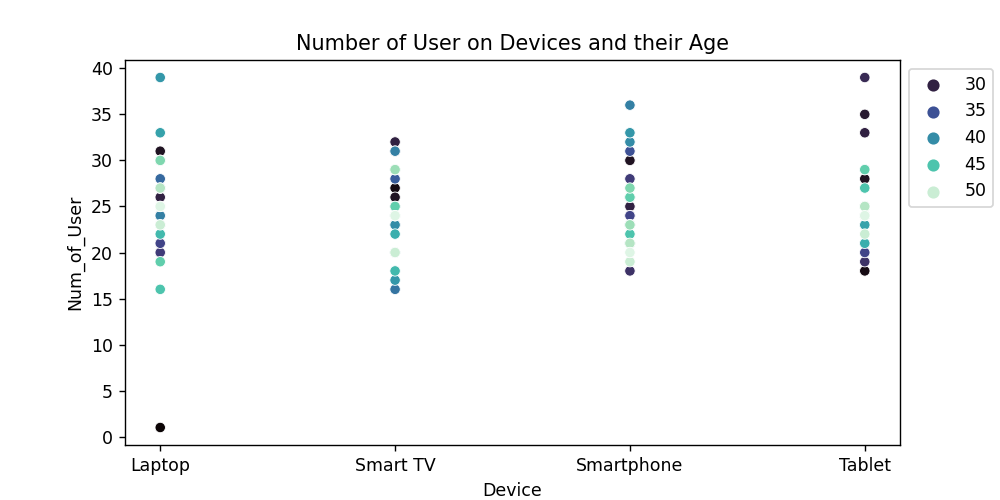

Text(0.5, 1.0, 'Number of User on Devices and their Age')

In [182]:
plt.figure(figsize=(8,4))
device_data = df.groupby(['Device','Age']).count()['User ID'].reset_index()
device_data.rename(columns = {'Device':'Device' , 'Age':'Age', 'User ID':'Num_of_User'}, inplace = True)
sns.scatterplot(data = device_data , x= 'Device' , y = 'Num_of_User', hue = 'Age', palette = 'mako')
plt.legend(loc= 'best' ,bbox_to_anchor=(1, 1))
plt.title('Number of User on Devices and their Age')

## Age distribution <a class="anchor" id="distribution"></a>

<IPython.core.display.Javascript object>


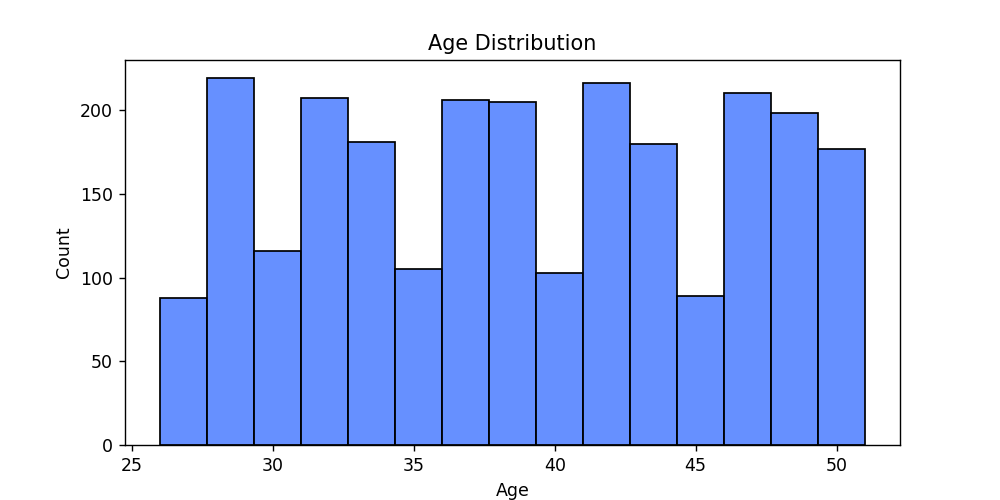

In [183]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,x="Age",stat="count",color = '#336BFF',bins = 15)
plt.title("Age Distribution")
plt.show()

## Devices used by countries <a class="anchor" id="Devices"></a>

          Country  Smartphone  Laptop  SmartTV  Tablet
0   United States          99     121      116     115
1          Canada          80      64       78      95
2  United Kingdom          54      44       40      45
3       Australia          55      47       38      43
4         Germany          36      63       42      42
5          France          47      52       43      41
6          Brazil          55      44       40      44
7          Mexico          46      44       41      52
8           Spain         102     107      126     116
9           Italy          47      50       46      40


<IPython.core.display.Javascript object>


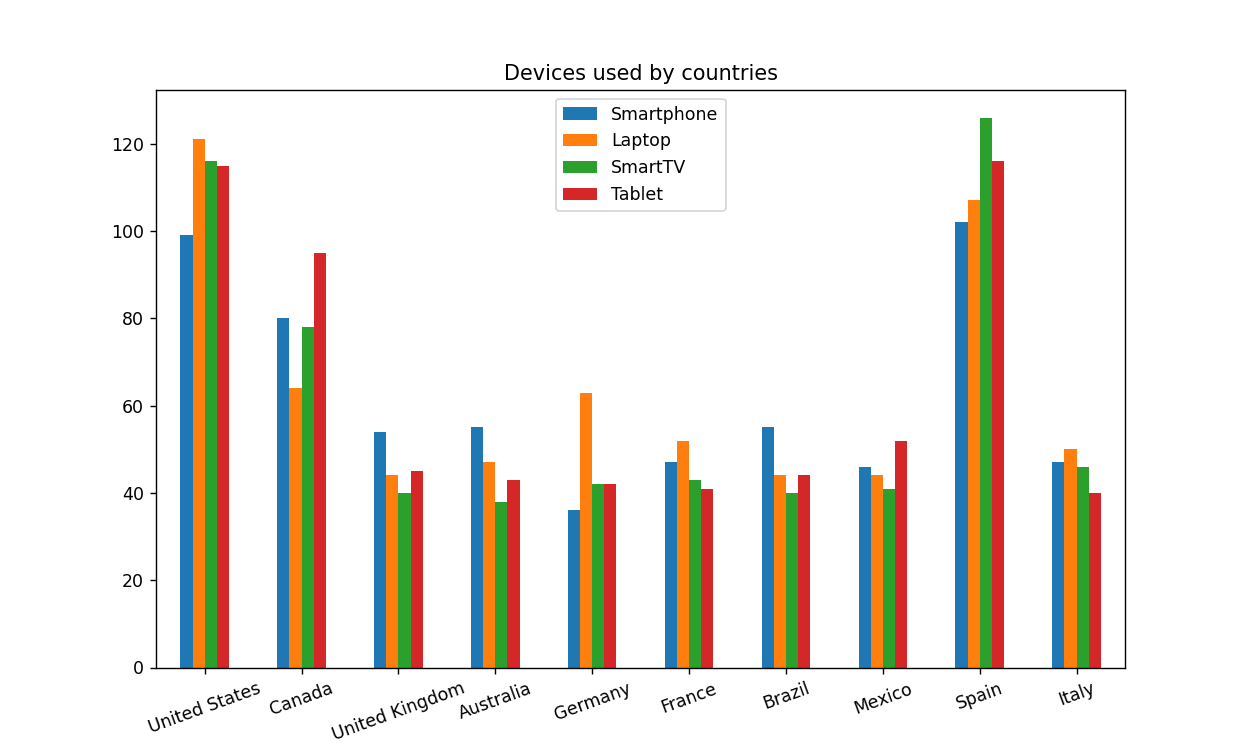

<Axes: title={'center': 'Devices used by countries'}, xlabel='Country'>

In [184]:
countryGroup = df.groupby(['Country'])
lst = []
for countries in df.Country.unique():
    smartphoneCount = countryGroup.get_group(countries).Device.value_counts()['Smartphone']
    laptopCount = countryGroup.get_group(countries).Device.value_counts()['Laptop']
    smartTVCount = countryGroup.get_group(countries).Device.value_counts()['Smart TV']
    tabletCount = countryGroup.get_group(countries).Device.value_counts()['Tablet']
     
    dic = {'Country': countries, 'Smartphone': smartphoneCount, 'Laptop': laptopCount, 'SmartTV': smartTVCount, 'Tablet': tabletCount}
    lst.append(dic)
newDF = pd.DataFrame.from_dict(lst)
print(newDF)
newDF.plot.bar(x = "Country", y = ["Smartphone",  "Laptop",  "SmartTV",  "Tablet"], title="Devices used by countries",figsize=(10,6), rot=20)

### Conclusion <a class="anchor" id="Conclution"></a>

#### Findings Overview
Although the least common plan is `premium` still that plan is making the most money, interesting insights about `Devices` and `Country`, how different countries prefer to watch Netflix. This is also interesting how almost every 5 years of age the amount of people using Netflix is dropped.



